Arden Chaing

Phys 434

October 20, 2020

Lab3

In [1]:
# neccessary imports for the assignment
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import PIL
from PIL import Image, ImageDraw, ImageFilter

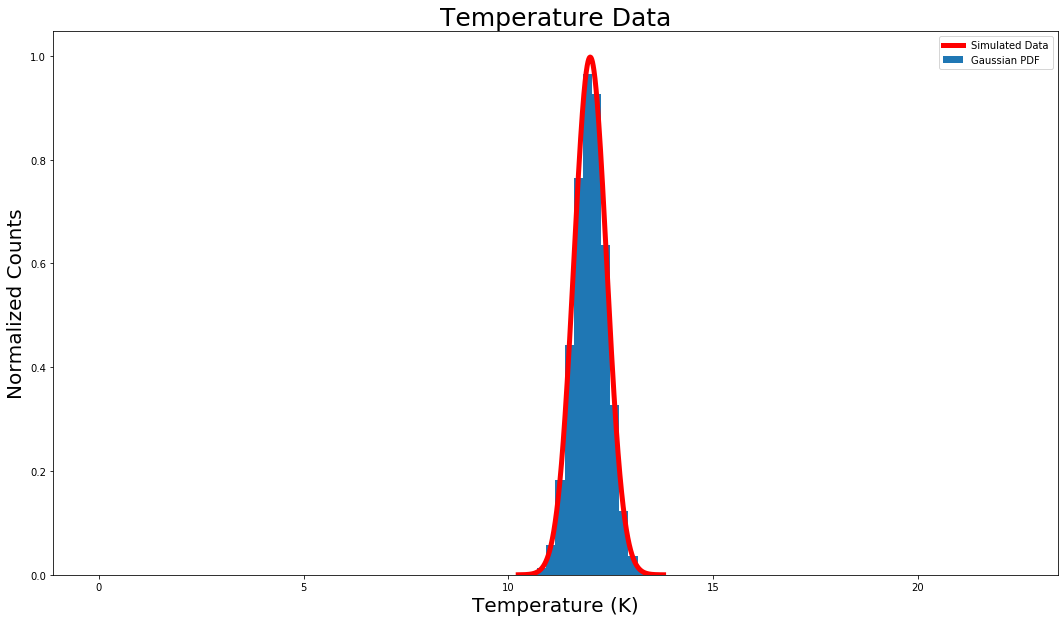

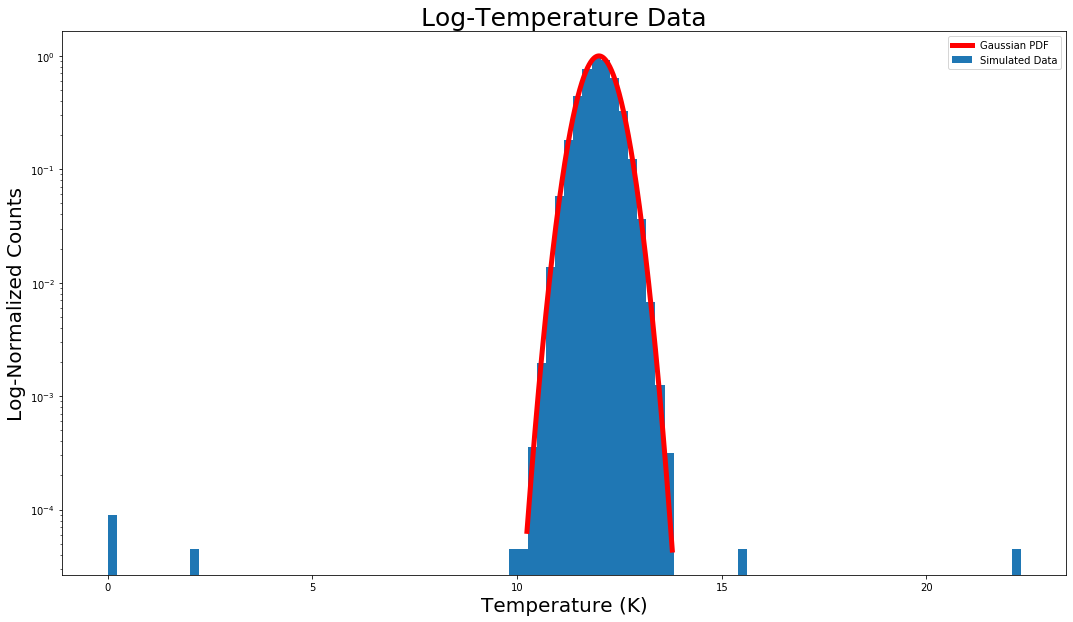

In [9]:
#1.A.1:
goodData = stats.norm.rvs(loc = 12, scale = 0.4, size = 100000)
badData = [10.0, 10.3, 2.1, 0.0, 0.0, 15.6, 22.3, 12.7]
x = np.linspace(goodData.min(), goodData.max(), 100000)
gpdf = stats.norm.pdf(x, loc=12, scale=0.4)
combo = np.append(goodData, badData)

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plt.hist(combo, 100, density = True, label = "Gaussian PDF")
plt.plot(x, gpdf, c = 'r', label = "Simulated Data", linewidth = 5)
plt.title("Temperature Data", fontsize = 25)
plt.xlabel("Temperature (K)", fontsize = 20)
plt.ylabel("Normalized Counts", fontsize = 20)
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plt.hist(combo, 100, density = True, label = "Simulated Data")
plt.plot(x, gpdf, c = 'r', label = "Gaussian PDF", linewidth = 5)
plt.yscale('log')
plt.title("Log-Temperature Data", fontsize = 25)
plt.xlabel("Temperature (K)", fontsize = 20)
plt.ylabel("Log-Normalized Counts", fontsize = 20)
plt.legend()
plt.show()

Problem 1.A.1: Above I have graphed the distribution of 100k good data points that hold a gaussian shape, with a mean of 12 and a standard deviation of 0.4 and also the 8 bad data points given. In addition I overlayed a pure Gaussian distribution. However, seen in the log graph, there are several outliers in our data and therefore we must find a way to optimize our data; maximizing the "good" data while limiting the "bad" data. 

Problem 1.A.2: We expect a signal-free background to yield a Gaussian pdf with a mean of 12 and a standard deviation of 0.4. However, we run into outliers which don't represent our data. Which of the data points are significant enough to no longer be considered a product of the background? And therefore what is the standard deviation value associated with the optimal cut off point?

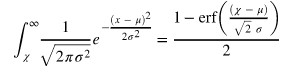

In [11]:
# 1.A.3:
Image.open('Lab3.1.jpg')

Problem 1.A.3: In order to find the optimal cutoff location we can use the equation above to calculate guassian pdf and set it equal to the probability of 5 sigma; since that's what we deem significant enough. This will yield what values of temperature are significant enough to be considered not created by the background. In order to find x we can utilize the equation (x-u)/(sigma). Therefore any temperature not in the range of 10-14 we can consider stastically significant enough to remove as bad data.

In [12]:
# 1.A.4: 
sigma=5
goodKept = goodData[np.where((goodData< 12+sigma*.4) & (goodData> 12-sigma*.4))]
goodDiscard = len(goodData) - len(goodKept)
badData = np.asarray(badData)
badKept = badData[np.where((badData>12-sigma*.4) & (badData<12+sigma*.4))]
badDiscard = len(badData) - len(badKept)
print('Sigma value:', sigma)
print('Pos True:', len(goodKept))
print('Pos False:', len(badKept))
print('Neg True:', badDiscard)
print('Neg False:', goodDiscard)

Sigma value: 5
Pos True: 100000
Pos False: 2
Neg True: 6
Neg False: 0


Problem 1.A.4: According to my truth table for a 5 sigma statistical significance, we are keeping 2 bad data values and all the good data values. 

In [14]:
# 1.B:
for i in range(1,4): 
    goodKept = goodData[np.where((goodData< 12+i*.4) & (goodData> 12-i*.4))]
    goodDiscard = len(goodData) - len(goodKept)
    badData = np.asarray(badData)
    badKept = badData[np.where((badData>12-i*.4) & (badData<12+i*.4))]
    badDiscard = len(badData) - len(badKept)
    print('Sigma value:', i)
    print('Kept Good Data:', len(goodKept))
    print('Kept Bad Data:', len(badKept))
    print('Discard Good Data:', badDiscard)
    print('Discard Bad Data:', goodDiscard)
    print()


Sigma value: 1
Kept Good Data: 68368
Kept Bad Data: 0
Discard Good Data: 8
Discard Bad Data: 31632

Sigma value: 2
Kept Good Data: 95513
Kept Bad Data: 1
Discard Good Data: 7
Discard Bad Data: 4487

Sigma value: 3
Kept Good Data: 99728
Kept Bad Data: 1
Discard Good Data: 7
Discard Bad Data: 272



Problem 1.B: Above I reran the code with different sigma values and as you can see the larger the threshhold the less likely you are to throw away good data. This is because more data will meet the demands of our threshold as the tolerances relax. And these omissions are predictable since we are dealing with a gaussian distribution. We know that within 1, 2, and 3 standard deviations the percentage of data inside that range is 68%, 95%, and 99.7% respectively.

Problem 1.C: Yes, there can be mistakes of commission. In our example with 5 sigma we had two bad data points. However, they are avoidable by making the statistical threshold smaller. However, this comes at a price described in the answer above. If we decrease the threshold too much then we omit more good data. So finding a good balance between accepting good data and rejecting bad data will yield the most optimal threshold. 

Problem 2.1: Given a 2 dimensional Guassian distribution with a mean of 0 and a standard deviation of 1 arc second as our signal-free background, at what movements of delta x and delta y would have a 5 sigma probability of occuring from our background and could thus be determined to be caused by potential asteroids?

5 sigma probability: 2.866515719235352e-07


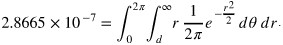

In [118]:
# 2.2: 
print('5 sigma probability:', str(1-stats.norm.cdf(5)))
Image.open('Lab3.2.jpg')

Problem 2.2: Above is the probability of 5 sigma for a normal gaussian distribution, which translates to the integral of the pdf from a value x out to infinity. If we want to know what distance corresponds to 5 sigma what we will want to look for is the bound d. Since it's a 2D distribution, d is essentially the hypotenuse equation. Therefore we are going to use r to be the distance from the origin. Since the distribution is radially symmetric we can convert into polar form and calculate the distance shown above and below. 

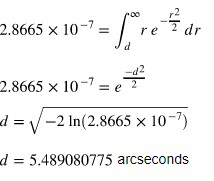

In [16]:
Image.open('Lab3.4.jpg')

Problem 3.1: We expect the moon to shadow the Earth from cosmic gamma rays. In a moon sized patch of the sky we expect to see 1 gamma ray a minute and this effectively gives us a Poisson background pdf. Assuming a Poisson signal-free background pdf with mu equal to 1 cosmic ray per minute, what is the significance of detecting 6,800 counts of gamma rays after 7,200 minutes of observing the moon?

Problem 3.2: We need to find the background pdf for a single minute then multiply that by 7200 minutes of observing the moon to get the proper background pdf. After that in order to get the probability we would observe 6800 or less counts of cosmic rays we would need to integrate the proper background pdf from negative infinity to 6800. After that we can calculate the sigma value corresponding to that for a standard normal distribution. A unique aspect of this problem is the definition of what it means for a measurement to be "more signal-like" - because seeing less cosmic rays indicates the presence of an object blocking the rays, seeing less cosmic rays corresponds to a stronger signal. Therefore this changes the bounds of our integral from 0 to 6800, instead of integrating from some point out to infinity. 

Question to math


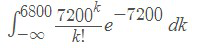

In [17]:
# 3.2:
print("Question to math")
Image.open('Lab3.3.jpg')

In [18]:
# 3.3: 
prob = np.abs(stats.poisson.cdf(6800, mu=7200))
sigma = stats.norm.ppf(prob)
print("Probability:", prob)
print("Sigma:", sigma)

Probability: 1.0133280183917768e-06
Sigma: -4.750747965777188


Problem 3.3: The significance of the moon shadow detection is 4.75 sigma.